In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
df=pd.read_excel("rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx")

In [8]:
df = df[['Tarih', 'İstanbul günlük tüketim(m³/gün)']]
df = df.set_index("Tarih")
df.index = pd.to_datetime(df.index)
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)
df = np.log(df)

In [9]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

In [10]:
def create_features(df):
    df=df.copy()
    df['dayofweek']= df.index.dayofweek
    df['quarter']= df.index.quarter
    df['month']= df.index.month
    df['year']= df.index.year
    df['dayofyear']= df.index.dayofyear
    return df
df=create_features(df)

In [11]:
train=create_features(train)
test=create_features(test)
FEATURES=['dayofweek','quarter','month','year','dayofyear']
TARGET='İstanbul günlük tüketim(m³/gün)'

In [12]:
X_train=train[FEATURES]
y_train=train[TARGET]

X_test=test[FEATURES]
y_test=test[TARGET]

In [13]:
rf_model = RandomForestRegressor(random_state = 42)

In [14]:
rf_model_fit=rf_model.fit(X_train, y_train)

## Tahmin

In [15]:
y_test_pred = rf_model_fit.predict(X_test)
#y_train_pred = rf_model_fit.predict(X_train)

In [16]:
rf_model_fit.predict(X_test)

array([10.24001958, 10.23976606, 10.23998967, 10.23352432, 10.2314912 ,
       10.22238144, 10.22358501, 10.22769216, 10.23063916, 10.23543277,
       10.23379416, 10.23045432, 10.24407622, 10.28668816, 10.30022752,
       10.30218316, 10.31207215, 10.32125752, 10.32315696, 10.32483983,
       10.33037478, 10.31854273, 10.31718893, 10.30038204, 10.27272513,
       10.2481035 , 10.25238925, 10.24789236, 10.25634942, 10.25793765,
       10.27158366, 10.28348345, 10.264353  , 10.26831396, 10.26437407,
       10.26776291, 10.27395341, 10.29385094, 10.30448943, 10.30015648,
       10.33294013, 10.36002174, 10.35760823, 10.35170152, 10.35107186,
       10.34561311, 10.34934622, 10.33167373, 10.32905151, 10.32335094,
       10.32170557, 10.31156812, 10.29610787, 10.30659496, 10.2990501 ,
       10.29780646, 10.2923064 , 10.29306223, 10.30963324, 10.3198152 ,
       10.31505502, 10.33053693, 10.35099785, 10.37527119, 10.3744637 ,
       10.38351736, 10.3808684 , 10.37963867, 10.3807099 , 10.37

In [17]:
len(rf_model_fit.predict(X_test))

943

In [18]:
mse_test=mean_squared_error(y_test,y_test_pred)
#mse_train=mean_squared_error(y_train,y_train_pred)
print(f"mse test: {mse_test}")
#print(f"mse train: {mse_train}")

mse test: 0.003065536356659849


In [19]:
rmse_test=np.sqrt(mse_test)
#rmse_train=np.sqrt(mse_train)
print(f"rmse test: {rmse_test}")
#print(f"rmse train: {rmse_train}")

rmse test: 0.055367285978814684


In [20]:
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Ortalama Mutlak Hata (MAE): {mae_test}")

Ortalama Mutlak Hata (MAE): 0.046038285139108424


In [21]:
def mean_absolute_percentage_error(y_true, y_test_pred):
    return np.mean(np.abs((y_true - y_test_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_test_pred)
print("Mean Absolute Percentage Error (MAPE) of KNN model:", mape)

Mean Absolute Percentage Error (MAPE) of KNN model: 0.44579762610116497


In [32]:
r2_test = rf_model_fit.score(X_test, y_test)
r2_train = rf_model_fit.score(X_train,y_train)
print(f"R-Squared: {r2_test}")
print(f"R-Squared: {r2_train}")

R-Squared: 0.8472891117402648
R-Squared: 0.9948511592507215


## Model Tuning

In [ ]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [ ]:
rf_cv_model.fit(X_train, y_train)

In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 6, 
                                 max_features = 10, 
                                 n_estimators =100)

In [ ]:
rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [22]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

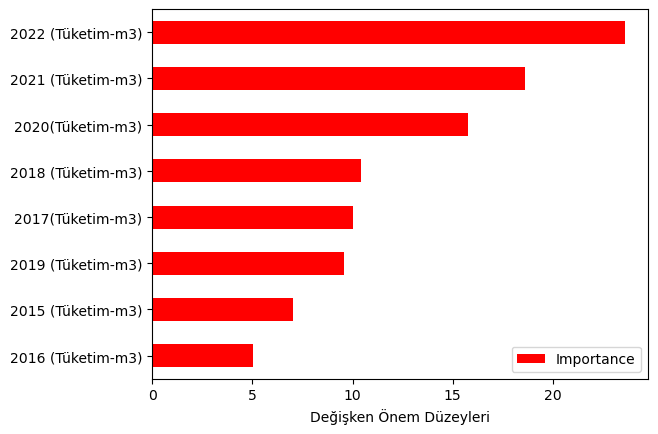

In [23]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")